<a href="https://colab.research.google.com/github/viveksahukar/eip/blob/master/vs_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


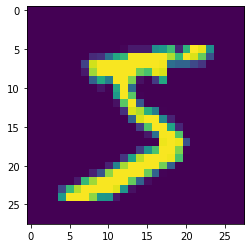

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 16s 271us/step - loss: 0.1463 - acc: 0.9547
Epoch 2/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0463 - acc: 0.9858
Epoch 3/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0331 - acc: 0.9895
Epoch 4/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0257 - acc: 0.9917
Epoch 5/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0207 - acc: 0.9931
Epoch 6/10
60000/60000 [==============================] - 16s 262us/step - loss: 0.0150 - acc: 0.9952
Epoch 7/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0136 - acc: 0.9957
Epoch 8/10
60000/60000 [==============================] - 16s 265us/step - loss: 0.0115 - acc: 0.9964
Epoch 9/10
60000/60000 [==============================] - 16s 261us/step - loss: 0.0111 - acc: 0.9965
Epoch 10/10
60000/60000 [==============================] - 16s 261us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.034929723278010076, 0.9924]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.86985006e-16 3.15438431e-09 1.29288670e-12 6.39458850e-14
  1.98188345e-15 1.95298904e-15 4.01689019e-20 1.00000000e+00
  1.83984555e-12 5.44572565e-09]
 [4.20577972e-09 1.24059556e-11 1.00000000e+00 1.39288960e-12
  1.39913024e-13 6.06205580e-20 1.12153741e-11 5.21163491e-16
  9.33717283e-14 3.63774323e-21]
 [1.20338071e-11 9.99999881e-01 1.30578479e-10 2.20909602e-15
  2.02268713e-09 9.21365828e-09 3.53048944e-11 1.17845886e-07
  9.74621384e-10 4.35391528e-10]
 [1.00000000e+00 1.81609892e-12 5.73223652e-14 1.97304196e-12
  2.84869567e-12 8.07842335e-12 6.96225388e-09 1.08097837e-13
  5.40498313e-10 9.26255128e-10]
 [9.17191583e-12 6.06337092e-10 2.77223550e-10 3.73842450e-12
  9.99994397e-01 1.53208331e-11 2.50139080e-12 8.52442827e-09
  5.39677851e-12 5.57449357e-06]
 [1.16735389e-11 1.00000000e+00 3.99188703e-11 1.67449778e-17
  6.19678128e-11 1.58917282e-10 1.62373251e-12 2.92921065e-09
  3.99371702e-10 1.54511872e-11]
 [7.05992384e-20 5.00779196e-09 1.03552606e-08 1.46671018e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

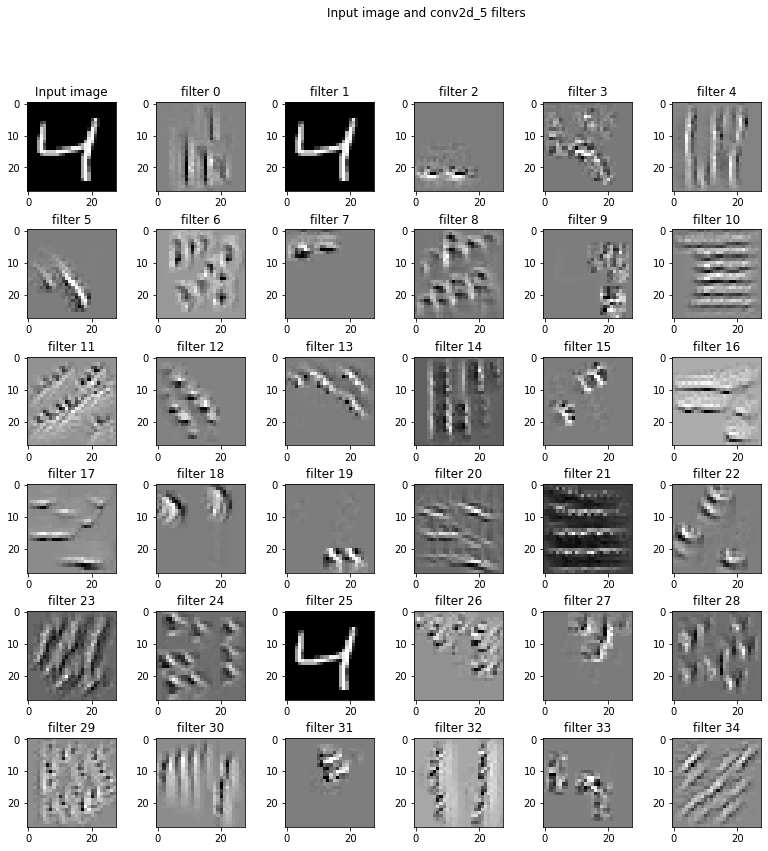

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()